In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error

%config InlineBackend.figure_format = 'svg' 
plt.style.use('bmh')
plt.rcParams['image.cmap'] = 'Paired_r'
%matplotlib inline

### 1. Dataset

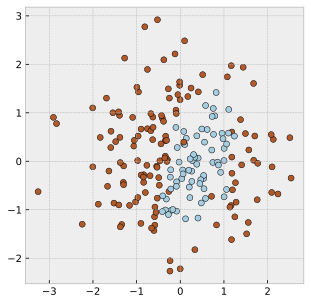

In [2]:
np.random.seed(5)

def f(X):
    X = X.copy()
    X[:,0] -= 0.4
    X[:,1] += 0.2
    return 1.1*X[:,0]**2 + 0.3*X[:,1]**2 - 0.6*X[:,0]*X[:,1]
def make_data():
    N = 200
    X = np.random.normal(size=(N, 2))
    Y = f(X) < 0.5
    X += np.random.normal(size=(N,2), scale=0.2)
    return X, Y
X, Y = make_data()


plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k');

In [3]:
print(X)

[[ 2.61808687e-01 -2.04327780e-01]
 [ 2.53780222e+00 -3.46922612e-01]
 [ 2.46607024e-01  1.51024228e+00]
 [-1.02471839e+00 -8.38582558e-01]
 [ 2.64699204e-01 -4.15707956e-01]
 [-1.30454987e+00 -4.34676506e-01]
 [-6.31860102e-01  4.45623800e-01]
 [-1.51879657e+00 -8.62955411e-01]
 [ 1.44036291e+00  1.93898290e+00]
 [-1.47956653e+00  4.04199378e-01]
 [-5.89890149e-01 -1.14497985e+00]
 [-7.65064161e-01 -8.36422645e-02]
 [ 9.56650382e-01  5.75716135e-01]
 [ 5.53446187e-02 -1.80178359e-01]
 [ 2.75030289e-01  1.49570948e-02]
 [ 5.79170195e-01 -7.66409590e-01]
 [ 3.44867021e-02 -3.56300644e-01]
 [-1.00368817e-01  6.97408373e-01]
 [-1.38322920e-02  1.56696038e+00]
 [-2.73472493e-01  1.49338752e+00]
 [-3.19879247e-01 -7.78836048e-01]
 [ 7.97222221e-02  6.14802638e-01]
 [ 4.13050906e-01  1.43151760e+00]
 [ 9.78443411e-01  4.65430042e-01]
 [-2.95871679e-01  3.51255636e-02]
 [ 1.68190039e+00  2.13879760e-02]
 [-9.70863515e-01 -7.46808479e-01]
 [-6.27840626e-01  9.10515398e-01]
 [-1.20723002e-01  2

In [4]:
print(Y)

[ True False False False  True False False False False False False False
  True  True  True  True  True  True False False  True  True False  True
 False False False False False  True False  True  True False False False
 False False  True False False  True  True False False False  True False
 False  True  True False  True False False  True  True False False False
 False False False False False False False False False False False False
 False  True False False False  True False False False  True False False
  True  True False  True False False False  True False  True False False
  True False  True  True  True False  True  True False False False False
 False False  True False False False  True  True False  True False False
 False  True  True False False False  True False False False  True  True
 False  True  True  True False False  True False False False False False
 False False False False  True  True False  True False False False  True
  True  True False False  True False False  True Fa

In [5]:
Y = Y.astype(int)
print(Y)

[1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1
 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1]


In [6]:
data = {'X1': X[:, 0], 'X2': X[:, 1], 'Y': Y}
dataset = pd.DataFrame(data)
dataset

,X1,X2,Y
0,0.261809,-0.204328,1
1,2.537802,-0.346923,0
2,0.246607,1.510242,0
3,-1.024718,-0.838583,0
4,0.264699,-0.415708,1
...,...,...,...
195,1.519671,-1.497403,0
196,1.380317,0.857821,0
197,-0.975477,0.013292,0
198,2.237693,-0.674783,0


In [7]:
dataset.corr()

,X1,X2,Y
X1,1.000000,-0.010950,0.274213
X2,-0.010950,1.000000,-0.117248
Y,0.274213,-0.117248,1.000000


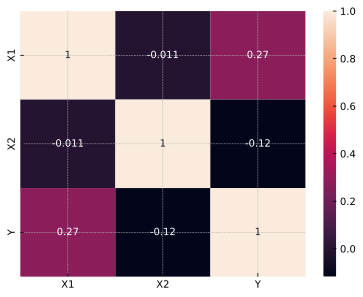

In [8]:
plt.figure()
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [9]:
x = dataset[['X1', 'X2']].values
y = dataset[['Y']].values

In [10]:
print(x.shape)
print(y.shape)

(200, 2)
(200, 1)


## Use the BIC to select the optimal polynomial model

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 2)
(40, 2)
(160, 1)
(40, 1)


In [12]:
# X_train = np.array(X_train).reshape(-1, 1)
# Define maximum polynomial degree
max_degree = 10

# Initialize lists to store BIC values and models
bic_values = []
models = []

# Loop over polynomial degrees
for degree in range(1, max_degree+1):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    
    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Compute number of parameters
    num_params = X_train_poly.shape[1]
    
    # Compute log-likelihood
    y_train_pred = model.predict(X_train_poly)
    log_likelihood = -0.5 * len(X_train) * np.log(mean_squared_error(y_train, y_train_pred))
    
    # Compute BIC
    bic = -2 * log_likelihood + num_params * np.log(len(X_train))
    
    # Append BIC value and model
    bic_values.append(bic)
    models.append(model)

# Find index of model with lowest BIC
best_model_idx = np.argmin(bic_values)
best_model = models[best_model_idx]
best_degree = best_model_idx + 1

print(f"Best polynomial degree: {best_degree}")

Best polynomial degree: 5


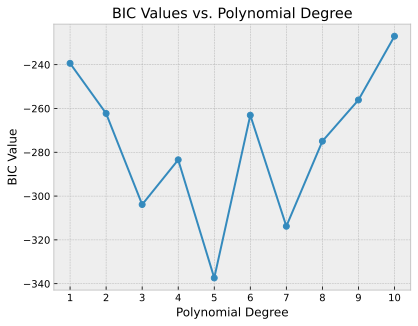

In [13]:
# Plot BIC values vs. polynomial degree
plt.plot(range(1, max_degree+1), bic_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('BIC Value')
plt.title('BIC Values vs. Polynomial Degree')
plt.xticks(range(1, max_degree+1))
plt.grid(True)
plt.show()

In [14]:
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    return res
degree=5
Poly_X_train = mapFeature(X_train[:, 0], X_train[:, 1], degree)
Poly_X_test = mapFeature(X_test[:, 0], X_test[:, 1], degree)
print(Poly_X_train)
print(Poly_X_train.shape)
print(Poly_X_test.shape)

[[ 1.00000000e+00 -1.59122445e+00  2.82218649e-01 ...  5.69141181e-02
  -1.00942551e-02  1.79031126e-03]
 [ 1.00000000e+00 -9.75477103e-01  1.32918443e-02 ...  2.23454907e-06
  -3.04479502e-08  4.14883561e-10]
 [ 1.00000000e+00  7.21762342e-01  2.31834141e-01 ...  6.49113460e-03
   2.08498910e-03  6.69710275e-04]
 ...
 [ 1.00000000e+00 -8.38317272e-01 -4.34556951e-01 ... -5.76709270e-02
  -2.98947702e-02 -1.54964959e-02]
 [ 1.00000000e+00 -2.27553082e-01 -3.27419480e-01 ... -1.81751912e-03
  -2.61517515e-03 -3.76289911e-03]
 [ 1.00000000e+00 -2.19341585e-01 -1.76199304e-01 ... -2.63180993e-04
  -2.11415942e-04 -1.69832555e-04]]
(160, 21)
(40, 21)


### 2. Modèle

In [15]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [16]:
def initialisation(X):
    np.random.seed(0)
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [17]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

W,b=initialisation(X)
modele(X, W, b)

### 3. Fonction Coût 

In [18]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### 4. Optimisation - Gradient et Descente de Gradient

In [19]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [20]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction

In [21]:
def predict(X, W, b):
    A = modele(X, W, b)
    #print(A)
    return A >= 0.5

### 6. Modèle final

In [22]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

C:\Users\T14s\AppData\Local\Temp\ipykernel_25828\661932952.py:2: RuntimeWarning: divide by zero encountered in log
  return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))


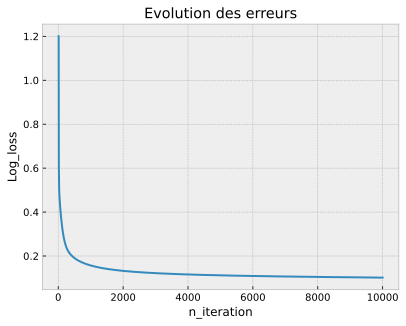

In [23]:
W,b=regression_logistique(Poly_X_train, y_train)

### 7. Evaluation du modèle et Visualisation

In [24]:
y_pred = predict(Poly_X_test, W, b)
print("Accuracy=",np.round(accuracy_score(y_test, y_pred)*100),'%')

Accuracy= 95.0 %


In [25]:
from sklearn.metrics import confusion_matrix
y_pred = predict(Poly_X_test, W, b)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[29  2]
 [ 0  9]]


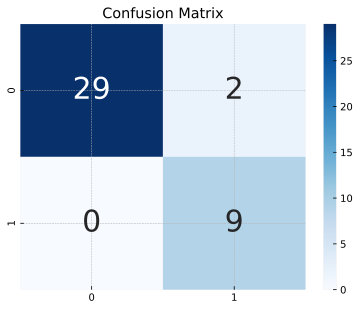

In [26]:
# Plot confusion matrix

ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

u [-3.         -2.89795918 -2.79591837 -2.69387755 -2.59183673 -2.48979592
 -2.3877551  -2.28571429 -2.18367347 -2.08163265 -1.97959184 -1.87755102
 -1.7755102  -1.67346939 -1.57142857 -1.46938776 -1.36734694 -1.26530612
 -1.16326531 -1.06122449 -0.95918367 -0.85714286 -0.75510204 -0.65306122
 -0.55102041 -0.44897959 -0.34693878 -0.24489796 -0.14285714 -0.04081633
  0.06122449  0.16326531  0.26530612  0.36734694  0.46938776  0.57142857
  0.67346939  0.7755102   0.87755102  0.97959184  1.08163265  1.18367347
  1.28571429  1.3877551   1.48979592  1.59183673  1.69387755  1.79591837
  1.89795918  2.        ] 

U= [[-3.         -2.89795918 -2.79591837 ...  1.79591837  1.89795918
   2.        ]
 [-3.         -2.89795918 -2.79591837 ...  1.79591837  1.89795918
   2.        ]
 [-3.         -2.89795918 -2.79591837 ...  1.79591837  1.89795918
   2.        ]
 ...
 [-3.         -2.89795918 -2.79591837 ...  1.79591837  1.89795918
   2.        ]
 [-3.         -2.89795918 -2.79591837 ...  1.79591837 

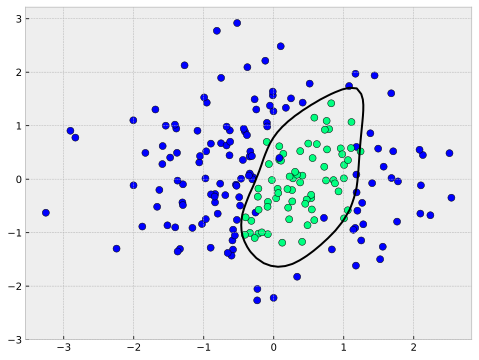

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.winter, s=50, edgecolors='k')
u = np.linspace(-3, 2, 50)
v = np.linspace(-3, 2, 50)
print('u',u,'\n')
U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
print('U=',U,'\n')
print('V=',V,'\n')

U = np.ravel(U)
V = np.ravel(V)

print('U applati=',U,'\n')
print('V applati=',V,'\n')
Z = np.zeros((len(u) * len(v)))

    
# Feature mapping
X_poly = mapFeature(U, V, degree)
Z = X_poly.dot(W)+b

print('Z=', Z,'\n')

# reshape U, V, Z back to matrix
U = U.reshape((len(u), len(v)))
print('U.shape',U.shape)

V = V.reshape((len(u), len(v)))
print('V.shape',V.shape)

Z = Z.reshape((len(u), len(v)))
print('Z.shape',Z.shape)

plt.grid(True)
plt.contour(U,V,Z,levels=[0],cmap= "Greys_r")